In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model

In [37]:
data = pd.read_csv('/home/derrick/Documents/4900/dataset.csv')

In [38]:
data.head()

,url,ip_address,Country,server,ptr,asn,asnname,domain,malicious,ads_blocked,...,open_ports_number,referers,GET_request_percentage,POST_request_percentage,HEAD_request_percentage,PUT_request_percentage,DELETE_request_percentage,CONNECT_request_percentage,OPTIONS_request_percentage,Phishing
0,https://shahwebsetters.com/live/docusign/,162.241.24.137,US,Apache,box5875.bluehost.com,AS46606,"UNIFIEDLAYER-AS-1, US",shahwebsetters.com,0,0,...,14,7,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1
1,https://digitalspirit.pt/wp/ZS/?59905&amp;emzo...,94.46.165.105,PT,Apache,vm01.bikesusadas.pt,AS24768,"ALMOUROLTEC, PT",digitalspirit.pt,0,0,...,16,4,0.985915,0.014085,0.0,0.0,0.0,0.0,0.0,1
2,https://0-105.com/Core/app/ellID/H/Signin,2001:8d8:100f:f000::2c3,DE,Apache,NaN,AS8560,"ONEANDONE-AS Brauerstrasse 48, DE",0-105.com,0,0,...,2,7,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1
3,https://bigdataprofile.com/wp-includes/wells/w...,104.45.95.61,IE,Microsoft-IIS/10.0,NaN,AS8075,"MICROSOFT-CORP-MSN-AS-BLOCK, US",bigdataprofile.com,0,0,...,2,0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1
4,https://santababa.in/wp-content/upgrade/745155...,63.250.38.10,US,Apache,premium90-5.web-hosting.com,AS22612,"NAMECHEAP-NET, US",santababa.in,0,0,...,19,3,0.978723,0.021277,0.0,0.0,0.0,0.0,0.0,1


In [39]:
data.shape

(1028, 49)

In [40]:
data['Country'] = pd.factorize(data['Country'])[0].astype(np.uint16)
data['server'] = pd.factorize(data['server'])[0].astype(np.uint16)
data['asn'] = pd.factorize(data['asn'])[0].astype(np.uint16)
data['protocol'] = pd.factorize(data['protocol'])[0].astype(np.uint16)
data['MX'] = pd.factorize(data['MX'])[0].astype(np.uint16)
data['NS'] = pd.factorize(data['NS'])[0].astype(np.uint16)
data['SOA'] = pd.factorize(data['SOA'])[0].astype(np.uint16)

In [41]:
X = data[['Country', 'server', 'asn', 'malicious', 'ads_blocked', 'totalLinks', 'urlScore' ,'secureRequests', 'securePercentage', 'IPv6Percentage', 'certificate', 'domain_age', 'contain_prefix', 'url_length', 'dot_number', 'validatity_period_time_stamp', 'is_redirect', 'iframe_number', 'mailtos_number', 'a_tag_number', 'domain_in_url', 'protocol', 'MX', 'NS', 'SOA', 'right_disable', 'hover_change_status_bar', 'indexed_by_google', 'webpage_rank', 'a_tag_url_number_percentage', 'meta_link_percentage', 'contain_popup_window', 'open_ports_number', 'referers', 'GET_request_percentage', 'POST_request_percentage', 'HEAD_request_percentage', 'PUT_request_percentage', 'DELETE_request_percentage', 'CONNECT_request_percentage', 'OPTIONS_request_percentage']]

In [42]:
X.head()

,Country,server,asn,malicious,ads_blocked,totalLinks,urlScore,secureRequests,securePercentage,IPv6Percentage,...,contain_popup_window,open_ports_number,referers,GET_request_percentage,POST_request_percentage,HEAD_request_percentage,PUT_request_percentage,DELETE_request_percentage,CONNECT_request_percentage,OPTIONS_request_percentage
0,0,0,0,0,0,3,0,56,88,75,...,0,14,7,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,1,0,1,0,0,4,0,71,100,90,...,0,16,4,0.985915,0.014085,0.0,0.0,0.0,0.0,0.0
2,2,0,2,0,0,6,0,47,100,83,...,0,2,7,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,3,1,3,0,0,2,0,1,100,0,...,0,2,0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,0,0,4,0,0,6,0,47,100,67,...,0,19,3,0.978723,0.021277,0.0,0.0,0.0,0.0,0.0


In [43]:
y = data[['Phishing']]

In [44]:
y.head()

,Phishing
0,1
1,1
2,1
3,1
4,1


In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [46]:
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(771, 41)
(771, 1)
(257, 41)
(257, 1)


In [47]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
print (linreg.intercept_)
print (linreg.coef_)

[1.03348214]
[[-1.77425852e-06 -1.03940088e-06 -6.33418999e-04  3.02701072e-05
   2.57603943e-11 -6.66979351e-04  3.02674528e-03 -1.28384039e-03
  -1.42137346e-03 -8.01530750e-06  5.02216237e-12 -2.22872935e-13
   5.42809005e-12  1.65234668e-03 -6.58139942e-04 -4.74155437e-13
  -5.80858427e-02  9.88098492e-15  3.51562153e-02 -1.21902488e-13
   2.66453526e-15 -9.79099215e-03 -1.08222184e-05 -9.25479436e-04
   8.13029282e-04  0.00000000e+00  0.00000000e+00 -3.18411356e-01
  -1.28157020e-07  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.34726466e-02  4.95849862e-03 -1.95621115e-01 -1.03800688e+00
  -6.13659117e+00 -4.53797154e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]]


In [49]:
y_pred = linreg.predict(X_test)
from sklearn import metrics
print ("MSE:",metrics.mean_squared_error(y_test, y_pred))
print ("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE: 0.10543766227440454
RMSE: 0.3247116602070282


In [50]:
X = data[['Country', 'server', 'asn', 'malicious', 'ads_blocked', 'totalLinks', 'urlScore' ,'secureRequests', 'securePercentage', 'IPv6Percentage', 'certificate', 'domain_age', 'contain_prefix', 'url_length', 'dot_number', 'validatity_period_time_stamp', 'is_redirect', 'iframe_number', 'mailtos_number', 'a_tag_number', 'domain_in_url', 'protocol', 'MX', 'NS', 'SOA', 'right_disable', 'hover_change_status_bar', 'indexed_by_google', 'webpage_rank', 'a_tag_url_number_percentage', 'meta_link_percentage', 'contain_popup_window', 'open_ports_number', 'referers', 'GET_request_percentage', 'POST_request_percentage', 'HEAD_request_percentage', 'PUT_request_percentage', 'DELETE_request_percentage', 'CONNECT_request_percentage', 'OPTIONS_request_percentage']]
y = data[['Phishing']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)
from sklearn import metrics

print ("MSE:",metrics.mean_squared_error(y_test, y_pred))

print ("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE: 0.10543766227440454
RMSE: 0.3247116602070282


In [51]:
X = data[['Country', 'server', 'asn', 'malicious', 'ads_blocked', 'totalLinks', 'urlScore' ,'secureRequests', 'securePercentage', 'IPv6Percentage', 'certificate', 'domain_age', 'contain_prefix', 'url_length', 'dot_number', 'validatity_period_time_stamp', 'is_redirect', 'iframe_number', 'mailtos_number', 'a_tag_number', 'domain_in_url', 'protocol', 'MX', 'NS', 'SOA', 'right_disable', 'hover_change_status_bar', 'indexed_by_google', 'webpage_rank', 'a_tag_url_number_percentage', 'meta_link_percentage', 'contain_popup_window', 'open_ports_number', 'referers', 'GET_request_percentage', 'POST_request_percentage', 'HEAD_request_percentage', 'PUT_request_percentage', 'DELETE_request_percentage', 'CONNECT_request_percentage', 'OPTIONS_request_percentage']]
y = data[['Phishing']]

from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(linreg, X, y, cv=10)

print ("MSE:",metrics.mean_squared_error(y, predicted))

print ("RMSE:",np.sqrt(metrics.mean_squared_error(y, predicted)))

MSE: 0.11592843637374528
RMSE: 0.34048265208927353


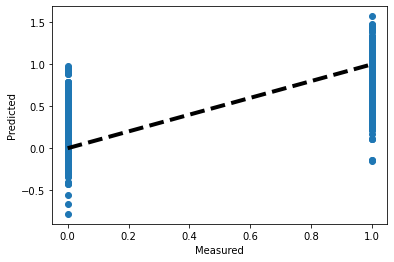

In [52]:
fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [56]:
from sklearn.externals import joblib
from sklearn import svm

In [57]:
clf = svm.SVC()

In [58]:

joblib.dump(clf, '/home/derrick/Documents/4900/clf.pkl')

['/home/derrick/Documents/4900/clf.pkl']